In [1]:
%load_ext autoreload
%autoreload 2
import sklearn.preprocessing as pre, scipy, numpy as np, matplotlib.pyplot as plt, glob, pickle, pyemma as py, sys, os
import pandas as pd
import seaborn as sns 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"
%matplotlib inline
from temp_tf_load import *
sys.path.append('../')
from hde import HDE, analysis
lag_time = 10
import warnings
warnings.filterwarnings('ignore')


/home/pme/anaconda3/envs/moleng37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pme/anaconda3/envs/moleng37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pme/anaconda3/envs/moleng37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pme/anaconda3/envs/moleng37/lib/python3.7/s

In [2]:
tf.__version__

'1.14.0'

In [3]:
# load thermo and pairwise distance features seperately
# only trains and plots on thermo

thermo_features = np.load('/home/pme/srv/srv/dna_data/thermo-176-1000-10.npy')
pwd_features = np.load('/home/pme/srv/srv/dna_data/pwd-176-1000-190.npy')

##select only certain thermo outputs to train on:
training_list = [1, 2, 3, 4, 5, 6, 7, 8]

training_features = []
for traj in thermo_features:
    training_traj = np.zeros((len(traj), len(training_list)))
    for i in range(len(training_list)):
        training_traj[:, i] = traj[:, training_list[i]]
    training_features.append(training_traj)

scaler = pre.MinMaxScaler(feature_range=(-1, 1))

scaler.fit(np.concatenate(thermo_features))
thermo_features_s = [scaler.transform(item) for item in thermo_features]

scaler.fit(np.concatenate(training_features))
training_features_s = [scaler.transform(item) for item in training_features]


print(np.shape(thermo_features))
print(np.shape(training_features))
print(np.shape(pwd_features))


(176, 1000, 10)
(176, 1000, 8)
(176, 1000, 190)


## HDE

In [4]:
skip = 1
from keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)


hde = HDE(len(training_list), n_components=3, lag_time=lag_time // skip, dropout_rate=0, batch_size=500, n_epochs=10, 
          validation_split=0.2, batch_normalization=True, learning_rate = 0.01,
          callbacks=[earlyStopping])


In [5]:
# hde.r_degree = 10    # pre-training, to speed up discovery of first few slowest modes
# hde.batch_size = 200000
# hde.n_epochs = 50
# hde.fit(pairwise_dis_s)
# hde._recompile = True
# hde.r_degree = 5
# hde.fit(pairwise_dis_s)
# hde.batch_size = 500000
# hde._recompile = True
# hde.r_degree = 2
# hde.n_epochs = 100
# hde.fit(pairwise_dis_s)

In [6]:
hde.r_degree = 2
hde.n_epochs = 100
hde.fit(np.concatenate(training_features))


Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 140792 samples, validate on 35198 samples
Epoch 1/100
140792/140792 [==============================] - 3s 20us/step - loss: -3.1046 - val_loss: -3.1464
Epoch 2/100
140792/140792 [==============================] - 2s 16us/step - loss: -3.1771 - val_loss: -3.1788
Epoch 3/100
140792/140792 [==============================] - 3s 18us/step - loss: -3.1887 - val_loss: -3.1975
Epoch 4/100
140792/140792 [==============================] - 2s 13us/step - loss: -3.2010 - val_loss: -3.1988
Epoch 5/100
140792/140792 [==============================] - 2s 14us/step - loss: -3.1993 - val_loss: -3.1990
Epoch 6/100
140792/140792 [==============================] - 3s 19us/step - loss: -3.1997 - val_loss: -3.1915
Epoch 7/100
140792/140792 [==============================] - 2s 15us/step - loss: -3.1993 - val_loss: -3.1898
Epoch 8/100
140792/140792 [=======

140792/140792 [==============================] - 1s 10us/step - loss: -3.2028 - val_loss: -3.1853
Epoch 68/100
140792/140792 [==============================] - 2s 11us/step - loss: -3.2028 - val_loss: -3.1919
Epoch 69/100
140792/140792 [==============================] - 2s 14us/step - loss: -3.2061 - val_loss: -3.2006
Epoch 70/100
140792/140792 [==============================] - 2s 12us/step - loss: -3.2076 - val_loss: -3.2074
Epoch 71/100
140792/140792 [==============================] - 2s 13us/step - loss: -3.2079 - val_loss: -3.2049
Epoch 72/100
140792/140792 [==============================] - 2s 11us/step - loss: -3.2072 - val_loss: -3.1952
Epoch 73/100
140792/140792 [==============================] - 2s 13us/step - loss: -3.2055 - val_loss: -3.1912
Epoch 74/100
140792/140792 [==============================] - 2s 13us/step - loss: -3.2069 - val_loss: -3.2041
Epoch 75/100
140792/140792 [==============================] - 2s 11us/step - loss: -3.2057 - val_loss: -3.1809
Epoch 76/100
1

HDE(activation=None, batch_normalization=True, batch_size=500,
    callbacks=[<keras.callbacks.EarlyStopping object at 0x7fe6573bd748>],
    dropout_rate=0, hidden_layer_depth=None, hidden_size=None, input_size=8,
    l2_regularization=0.0, lag_time=10, latent_space_noise=0,
    learning_rate=0.01, n_components=3, n_epochs=100, validation_split=0.2,
    verbose=True)

In [7]:
hde_coords = [hde.transform(item) for item in training_features]
hde_timescales = hde.timescales_
print(hde_timescales)

[230.63693594  76.32538842  31.48831012]


In [8]:
## make pandas data frame

skip = 10    #num coords to skip on plot

hde_coords_conc = np.concatenate(hde_coords[::skip])
thermo_features_conc = np.concatenate(thermo_features[::skip])

index_size = len(hde_coords_conc[:, 0])
print (np.shape(hde_coords_conc))
print (np.shape(thermo_features_conc))

df_hde = pd.DataFrame(data    = hde_coords_conc, 
                   columns = ['1st_sm', '2nd_sm', '3rd_sm'], 
                   index   = np.linspace(1, index_size, index_size))

feature_col_list = ['Step', 'nbp', 'E_bond', 'E_angle', 'E_dihed', 'ebp', 'ecstk', 'eexcl', 'dna_ecou', 'Temp']

#make additional df column for timestep
lin_x = [i for i in range(len(thermo_features[0]))] 
lin_x_list = []
for i in range(len(thermo_features)):
    lin_x_list.append(lin_x)
    
lin_x_conc = np.concatenate(lin_x_list[::skip])
print(np.shape(lin_x_conc))

df_thermo =  pd.DataFrame(data    = thermo_features_conc, 
                   columns = feature_col_list, 
                   index   = np.linspace(1, index_size, index_size))

df_thermo['time_traj'] = lin_x_conc
                          
df = df_hde.join(df_thermo)

print(df.head())

(18000, 3)
(18000, 10)
(18000,)
       1st_sm    2nd_sm    3rd_sm       Step  nbp    E_bond    E_angle  \
1.0 -0.869393 -0.504092 -0.957005  1040400.0  2.0  7.935557 -23.040356   
2.0 -0.846427 -0.774193 -0.790221  1040600.0  5.0  9.929279 -21.263138   
3.0 -0.865186 -0.626546 -0.931779  1040800.0  5.0  8.140379 -22.563613   
4.0 -0.788561 -1.028757 -0.178964  1041000.0  3.0  6.295717 -11.668592   
5.0 -0.757127 -1.046286  0.107571  1041200.0  1.0  6.435007 -11.198918   

       E_dihed        ebp     ecstk     eexcl  dna_ecou       Temp  time_traj  
1.0 -34.730443 -18.621563 -3.570152  0.090113  5.602751  360.08315          0  
2.0 -30.753449 -19.307943 -3.987068  0.045066  5.875551  269.02713          1  
3.0 -33.968769 -19.360267 -3.463940  0.075396  5.778132  290.16190          2  
4.0 -28.020738 -14.981091 -2.649475  0.070872  6.061251  302.24803          3  
5.0 -31.827312 -11.320550 -2.054480  0.721477  5.892542  346.90160          4  


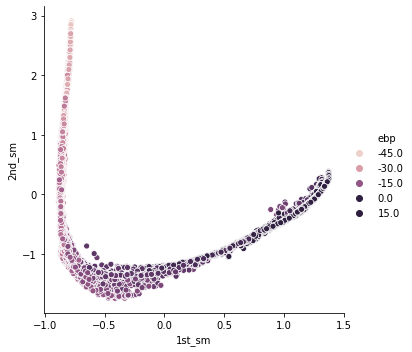

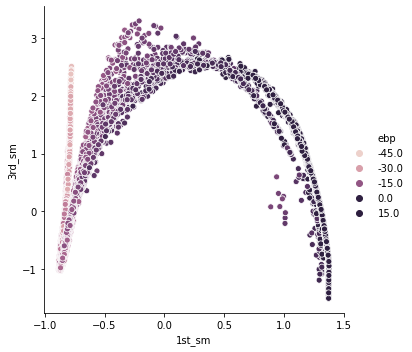

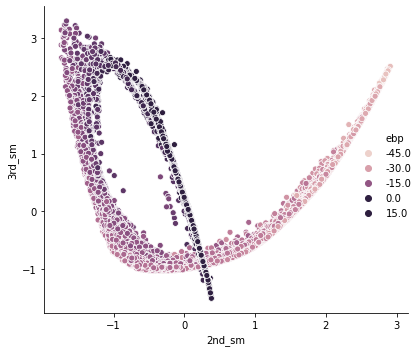

In [9]:
## Graphing slow modes and using physical properties as color gradients
## thermo_features index: 
# Step(0) nbp(1) E_bond(2) E_angle(3) E_dihed(4) ebp(5) ecstk(6) eexcl(7) dna_ecou(8) Temp(9)

#f, axes = plt.subplots(3, 1)
#sns.despine(left=True)

sns.relplot(data = df,
            x = "1st_sm", 
            y = "2nd_sm", 
            hue = "ebp",
            #ax=axes[0]
            )

sns.relplot(data = df,
            x = "1st_sm", 
            y = "3rd_sm", 
            hue = "ebp",
            #ax=axes[1]
            )

sns.relplot(data = df,
            x = "2nd_sm", 
            y = "3rd_sm", 
            hue = "ebp",
            #ax=axes[2]
            )

plt.tight_layout()
#plt.show()


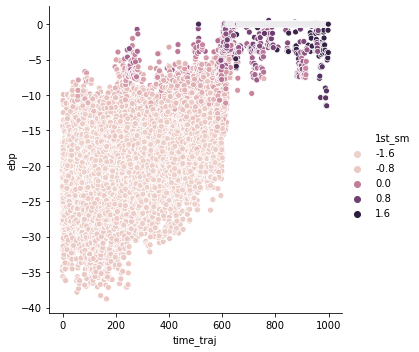

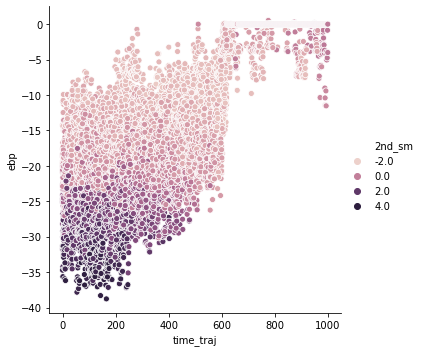

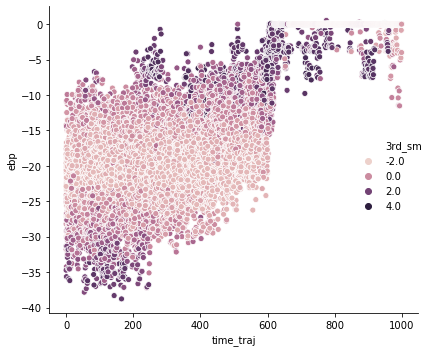

In [10]:
## Graphing physical property comparisons and using slow modes as color gradient
## thermo_features index: 
# Step(0) nbp(1) E_bond(2) E_angle(3) E_dihed(4) ebp(5) ecstk(6) eexcl(7) dna_ecou(8) Temp(9) time_traj (10)

sns.relplot(data = df,
            x = "time_traj", 
            y = "ebp", 
            hue = "1st_sm",
            )

sns.relplot(data = df,
            x = "time_traj", 
            y = "ebp", 
            hue = "2nd_sm",
            )

sns.relplot(data = df,
            x = "time_traj", 
            y = "ebp", 
            hue = "3rd_sm",
            )

plt.tight_layout()

